## ⚡ Final Mission: Mapping SkyNet's Energy Nexus

### 🌐 The Discovery
SkyNet is harvesting energy from Trondheim's buildings. Some structures provide significantly more power than others.

### 🎯 Your Mission
Predict the **Nexus Rating** of unknown buildings in Trondheim (test set).

### 🧠 The Challenge
1. **Target**: Transform the Nexus Rating to reveal true energy hierarchy
2. **Data Quality**: Handle missing values and categorical features
3. **Ensembling**: Use advanced models and ensemble learning

### 💡 Hint
You suspect that an insider has tampered with the columns in the testing data... 

Compare the training and test distributions and try to rectify the test dataset.

### 📊 Formal Requirements
1. **Performance**: Achieve RMSLE <= 0.294 on the test set
2. **Discussion**:

   a. Explain your threshold-breaking strategy

   b. Justify RMSLE usage. Why do we use this metric? Which loss function did you use?

   c. Plot and interpret feature importances

   d. Describe your ensembling techniques

   e. In real life, you do not have the test targets. How would you make sure your model will work good on the unseen data? 

---

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

train = pd.read_csv('final_mission_train.csv')
test = pd.read_csv('final_mission_test.csv')

nexus_rating
38000000.0     178
40000000.0     126
39000000.0     119
45000000.0     111
52000000.0     102
              ... 
262800000.0      1
395000000.0      1
219700000.0      1
376390000.0      1
94680000.0       1
Name: count, Length: 1880, dtype: int64

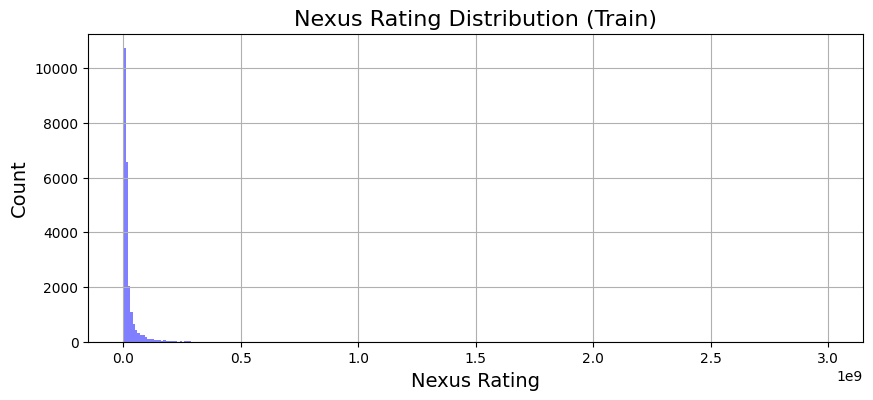

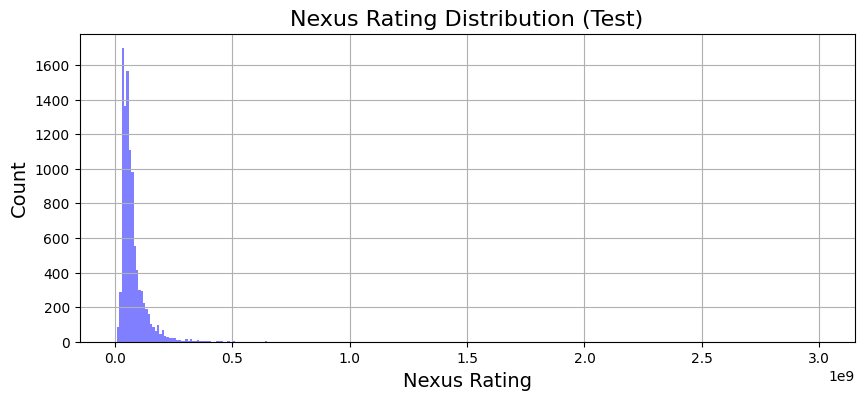

In [105]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
train['nexus_rating'].hist(bins=300, ax=ax, color='blue', alpha=0.5, label='Train Target Distributuon', range=[0, 3 * 10**9])
ax.set_title('Nexus Rating Distribution (Train)', fontsize=16)
ax.set_xlabel('Nexus Rating', fontsize=14)
ax.set_ylabel('Count', fontsize=14)

fig, ax = plt.subplots(1, 1, figsize=(10, 4))
test['nexus_rating'] = test['nexus_rating'] * 10**6 # Or maybe 6
# test['nexus_rating'] = np.log1p((test['nexus_rating']**2) * 4000)
# train['nexus_rating'] = np.log1p(train['nexus_rating'])
test['nexus_rating'].hist(bins=300, ax=ax, color='blue', alpha=0.5, label='Train Target Distributuon', range=[0, 3 * 10**9])
ax.set_title('Nexus Rating Distribution (Test)', fontsize=16)
ax.set_xlabel('Nexus Rating', fontsize=14)
ax.set_ylabel('Count', fontsize=14)

test['nexus_rating'].value_counts()


In [106]:
from sklearn.metrics import mean_squared_log_error

def rmsle(y_true, y_pred):
    """ Root Mean Squared Logarithmic Error """
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

In [107]:
train.describe()

,ownership_type,nexus_rating,energy_footprint,core_reactor_size,harvesting_space,vertical_alignment,power_chambers,energy_flow_design,upper_collector_height,shared_conversion_units,isolated_conversion_units,internal_collectors,external_collectors,ambient_harvesters,shielded_harvesters,efficiency_grade,grid_connections
count,14455.000000,2.328500e+04,23285.000000,18564.000000,19403.000000,23285.000000,23285.000000,5643.000000,12192.000000,19413.000000,19413.000000,15213.000000,15213.000000,12765.000000,12765.000000,13475.000000,23205.000000
mean,1.875683,2.355617e+07,74.450999,12.552279,38.741367,8.969594,2.189349,1.039695,3.268374,0.737547,0.662855,0.797147,0.468678,0.556365,0.673090,1.270501,1.162293
std,1.089518,5.264393e+07,58.671373,6.565686,31.398480,8.322039,1.076130,0.351507,10.802728,0.781173,0.716888,0.402137,0.499034,0.641257,0.664779,1.017037,0.456937
min,0.000000,9.000000e+05,9.300000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,7.490000e+06,42.000000,8.200000,20.000000,3.000000,1.000000,1.000000,2.650000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2.000000,1.064500e+07,59.800000,10.700000,30.900000,7.000000,2.000000,1.000000,2.800000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
75%,3.000000,2.050000e+07,84.800000,15.300000,45.300000,12.000000,3.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000
max,3.000000,2.600000e+09,2181.000000,100.000000,900.000000,95.000000,6.000000,2.000000,340.000000,4.000000,4.000000,1.000000,1.000000,4.000000,4.000000,3.000000,2.000000


In [108]:
original_energy = test['energy_footprint'].copy()
test.iloc[:, 2:] = test.iloc[:, 2:].shift(1, axis=1)
test['energy_footprint'] = original_energy
test.describe()

,ownership_type,nexus_rating,energy_footprint,core_reactor_size,harvesting_space,vertical_alignment,power_chambers,energy_flow_design,upper_collector_height,shared_conversion_units,isolated_conversion_units,internal_collectors,external_collectors,ambient_harvesters,shielded_harvesters,efficiency_grade,grid_connections
count,5995.000000,9.937000e+03,7704.000000,7704.000000,7918.000000,9937.000000,9937.000000,2569.000000,4919.000000,8220.000000,8220.000000,6449.000000,6449.000000,5102.000000,5102.000000,5978.000000,9897.000000
mean,1.805838,7.514422e+07,12.874883,12.874883,39.500515,9.184160,2.202878,1.036201,3.725885,0.776642,0.611922,0.809273,0.438518,0.584673,0.632301,1.259284,1.175003
std,1.087742,5.635932e+07,6.878015,6.878015,33.145228,7.963073,1.107315,0.334674,15.915162,0.811608,0.709386,0.392905,0.496244,0.645422,0.669174,1.041879,0.462727
min,0.000000,1.300000e+07,1.200000,1.200000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,4.240000e+07,8.200000,8.200000,20.000000,3.000000,1.000000,1.000000,2.650000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2.000000,5.960000e+07,10.800000,10.800000,31.000000,7.000000,2.000000,1.000000,2.800000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
75%,3.000000,8.600000e+07,16.000000,16.000000,45.400000,13.000000,3.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000
max,3.000000,1.175000e+09,63.600000,63.600000,528.000000,69.000000,6.000000,2.000000,350.000000,4.000000,4.000000,1.000000,1.000000,4.000000,4.000000,3.000000,2.000000


In [109]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, RocCurveDisplay, roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

classifier_rf = RandomForestRegressor(random_state=42)

param_grid_rf = {
    # "max_features": ["sqrt", 0.5],     # 'sqrt' is the strong default; also try a wider fraction
    # "max_features": [1.0]
    "min_samples_leaf": [10],        # regularization; 1 vs a small leaf
    # "max_depth": [None, 12, 20],       # either unlimited or a couple of caps
}

grid_search_rf = GridSearchCV(
    classifier_rf,
    param_grid_rf,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
    verbose=1

)
x_train = train.drop(columns=["nexus_rating"]).copy()
y_train = train['nexus_rating']
classifier_rf.fit(x_train, y_train)
x_test = test.drop(columns=["nexus_rating"]).copy()
y_pred = classifier_rf.predict(x_test)


In [115]:
# Example rmsle check
test['pred'] = y_pred
# print(test['pred'].describe())
print('RMSLE: ', rmsle(test['nexus_rating'], test['pred']))
print('Required RMSLE: ', 0.294)
train.describe()


train['energy_footprint'].sort_values(ascending=False).head(20)

RMSLE:  2.743926853488907
Required RMSLE:  0.294


21414    2181.00
3217     2181.00
13938    1971.00
2804      990.00
15840     905.00
2992      795.00
10269     793.00
19983     750.00
2468      750.00
2811      738.87
2546      738.80
2836      696.00
2466      696.00
18888     670.00
22523     656.20
20451     656.20
15837     653.00
3547      653.00
631       642.10
22411     642.00
Name: energy_footprint, dtype: float64

In [116]:
test['energy_footprint'].sort_values(ascending=False).head(20)

4622    63.6
505     63.0
7928    61.9
3237    61.9
7300    60.0
3875    60.0
3437    58.0
6292    54.0
6116    54.0
5196    52.9
5455    52.0
5082    51.4
1417    51.0
6580    50.0
4554    50.0
1262    50.0
5271    50.0
3859    50.0
6876    50.0
1115    50.0
Name: energy_footprint, dtype: float64